# **Stochastic processes**

## Stochastic processes in continuous time

*Autores: Daniel Beteta Francisco, Ignacio Cordova Pou y Luís Sánchez Polo*

# **Libraries used**

In [ ]:
import arrival_process_simulation as arrival 
import stochastic_plots as stoch 
import matplotlib.pyplot as plt
import numpy as np

import math 
import utils_sims
import utils_plots

np.random.seed(123)

# **Exercise 1** 

A poisson process with rate $\lambda$ can be defined as a counting process {$N(t);t\geq0$} with the folowwing properties:

a) $N(0) = 0

b) $N(t)$ has independent and stationary increments
 
c) Let $\Delta N(t) = N(t + \Delta t)-N(t)$ with $\Delta t \to 0^+$. The following relations hold: 
$$
P[\Delta N(t) = 0 ] = 1 - \lambda \Delta t + o(\Delta t ) \ \ \ (1) \\ P[\Delta N(t) = 1 ] = \lambda \Delta t + o(\Delta t ) \ \ \ \ \ \ \ \ \ \ (2) \\ P[\Delta N(t) \geq 2 ] = o(\Delta t) \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ (3)
$$
From this definition show that: 
$$
P[N(t)=n] = \frac{1}{n!} \lambda^n t^n e^{-\lambda t}. \ \ \ \ (4)
$$

### **Solution**

The differential equation for $P[N(t)=n]; \ n \geq 1$ can be derived from: 
$$
P[N(t+\Delta t)=n] = \sum_{k=0}^n P[N(t)=k] \ P[\Delta N(t) = n-k]
$$
Take the terms $k=n$ and $k=n-1$ in order to use $(1)$ and $(2)$: 
$$
P[N(t+\Delta t)=n] =  \sum_{k=0}^{n-2} P[N(t)=k] \ P[\Delta N(t) = n-k] + P[N(t)=n-1] \ P[\Delta N(t) = 1] + P[N(t)=n] \ P[\Delta N(t) = 0]
$$
Substituting the properties $(1)$, $(2)$ and $(3)$ we get: 
$$
P[N(t+\Delta t)=n] =  \sum_{k=0}^{n-2} P[N(t)=k] \ o(\Delta t) + P[N(t)=n-1] \ \{ \lambda \Delta t + o(\Delta t ) \} + P[N(t)=n] \  \{ 1 - \lambda \Delta t + o(\Delta t ) \}
$$
Using $\Delta t \to 0$ we obtain: 
$$
\frac{P[N(t + \Delta t)=n] - P[N(t)=n]}{\Delta t} = - \lambda \{ \ P[N(t)=n] - P[N(t)=n-1] \ \}
$$
$$
\frac{d \ P[N(t)=n]}{dt} = - \lambda \{ \ P[N(t)=n] - P[N(t)=n-1] \ \}
$$

The next step is to show that $(4)$ satisfies this differential equation. To this end we calculate both sides of the differential equation. 

Left side: 
$$
\frac{d \ P[N(t)=n]}{dt} = \frac{1}{n!} \lambda^n t^{n-1} e^{-\lambda t } [n - \lambda t]
$$

Right side: 
$$
- \lambda \{ \ P[N(t)=n] - P[N(t)=n-1] \ \} =  \frac{1}{n!} \lambda^n \ n \ t^{n-1} e^{-\lambda t} - \frac{1}{n!} \lambda^{n+1} t^n e^{-\lambda t} = \\ = \frac{1}{n!} \lambda^n t^{n-1} e^{-\lambda t } [n - \lambda t]
$$
as we wanted to prove. 

**Illustrate the validity of the derivation by comparing the empirical distribution obtained in a simulation of the Poisson process and the theoretical distribution of $P [N (t) = n]$ given by Eq. $(4)$ for the values $\lambda = 10$, $t = 2$.** 

### **Solution** 

Our approach is to simulate M Poisson processes between $t=0$ and $t=2$ and count the number of times that each count $N(t=2)$ equals to $n$ for $n=0,1,2...$. This will result in an empirical probability distribution that we can compare to $(4)$.

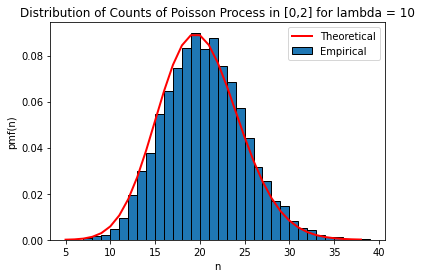

In [ ]:
# empirical distribution
counts_per_poisson_process = utils_sims.get_counts_per_poisson_process(
    initial_time=0.0, final_time=2.0, 
    lambda_rate=10.0, amount_of_trajectories=10000
)

# theoretical distribution 
theoretical_distribution = utils_sims.get_pmf_of_num_of_counts(
    lambda_rate=10.0, final_time=2.0
)

utils_plots.plot_pmf(counts_per_poisson_process, theoretical_distribution) 

Commentaries: as expected, the distribution peaks at $n=20$ which corresponds to $\lambda \ t_1$.

# **Exercise 2** 

Simulate a Poisson process with $\lambda = 5.0$. From these simulations show for different values of $n = 1, 2, 5, 10$  that the probability density of the nth arrival is
$$
f_{S_n}(t) = \frac{1}{(n-1)!} \lambda^n t^{n-1} e^{-\lambda t} 
$$

#### **Solution** 

For this exercise, we fix the values of $\lambda$ and $n$ and visualize the dependence of $f_{S_n}$ as a function of time. This distribution is the Erlang distribution which corresponds to the Gamma distribution with a positive integer shape parameter. 

To solve this exercise we simulate M Poisson processes and register at what times does the $n^{th}$ arrival occurr. We can then show the empirical distribution using a histogram with the variable $t$ on the horizontal axis. 

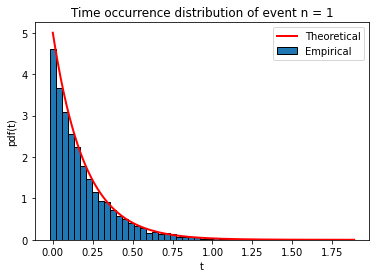

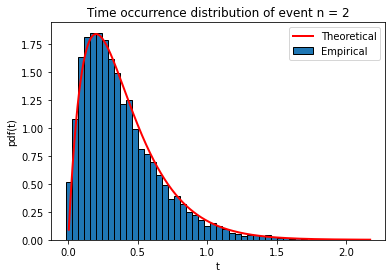

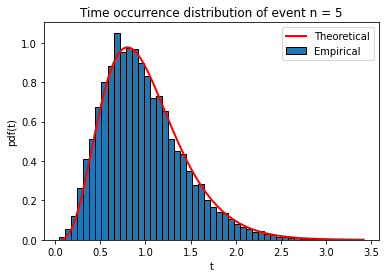

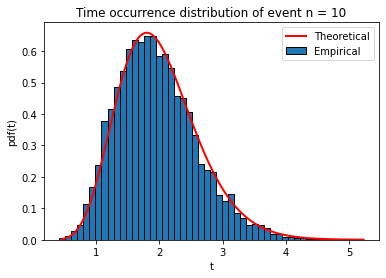

In [ ]:
# simulation 
times = arrival.simulate_poisson(t0=0.0, t1=7.0, lambda_rate=5.0, M=10000)

# theoretical distribution 
lambda_rate=5.0
theoretical_distribution = lambda t: (1/ math.factorial(n-1)) * lambda_rate**n * t**(n-1) * np.exp(-lambda_rate*t) 

# empirical distribution comparisson for different n 
n_list = [1, 2, 5, 10]
for n in n_list:
  utils_plots.plot_erlang(times, theoretical_distribution, n)


# **Exercise 3** 

Asume that we have a sample $\{U_i\}_{i=1}^n$ of $n$ iid $U[0,t]$. The probability density of the order statistic $\{U_{(1)} < U_{(2)} < \dots < U_{(n)}\}$ is

$$
    f_{\{U_{(i)}\}_{i=1}^n} \left(\{u_{(i)}\}_{i=1}^n \right) = \frac{n!}{t^n}.
$$

Let $\{N(t); t \geq 0\}$ be a Poisson process with rate $\lambda$. Show that conditioned on $N(t) = n$, the distribution of arrival times $\{0 < S_1 < \dots < S_n\}$ coincides with the distribution of order statistics of $n$ iid $U[0,t]$ random variables
    
$$
    f_{\{S_{(i)}\}_{i=1}^n|N(t)} \left(\{s_{(i)}\}_{i=1}^n | n \right) = \frac{n!}{t^n}.
$$

#### **Solution** 

**Step 1: use the Bayes theorem to calculate the density $f_{\{S_{(i)}\}_{i=1}^{n+1}|N(t)} \left(\{s_{(i)}\}_{i=1}^{n+1} | n \right)$**

$$
f_{\{S_{(i)}\}_{i=1}^{n+1}|N(t)} \left(\{s_{(i)}\}_{i=1}^{n+1} | n \right) = \frac{f_{\{S_{i}\}_{i=1}^{n+1}}(\{s_i\}_{i=1}^{n+1})f_{N(t)|\{S_i\}_{i=1}^{n+1}}(n|\{s_i\}_{i=1}^{n+1})}{f_{N(t)}(n)}
$$

**Step 2: Use the fact that $N(t)=n$ if and only if $s_n \leq t \lt s_{n+1}$**
$$ f_{N(t)|\{S_i\}_{i=1}^{n+1}}(n|\{s_i\}_{i=1}^{n+1}) =  \begin{cases}
1  & s_n\leq t <s_{n+1} \\
 0 & \text{otherwise}
\end{cases}$$

**Step 3 This simplifies the Bayes equation and allows us to focus only in $s_n \leq t \lt s_{n+1}$:** 
$$
f_{\{S_{(i)}\}_{i=1}^{n+1}|N(t)} \left(\{s_{(i)}\}_{i=1}^{n+1} | n \right) = \frac{f_{\{S_{i}\}_{i=1}^{n+1}}(\{s_i\}_{i=1}^{n+1}) \times 1}{f_{N(t)}(n)} \ \ \ ; \ \ s_n \le t \lt s_{n+1}
$$

**Step 4: use the fact that:** 
$$
f_{\{S_{i}\}_{i=1}^{n+1}|N(t)}(\{s_i\}_{i=1}^{n+1}|n) = f_{S_{n+1}|\{S_i\}_{i=1}^n,N(t)}(s_{n+1}|\{s_i\}_{i=1}^n,n)f_{\{S_i\}_{i=1}^n|N(t)}(\{s_i\}_{i=1}^n|n)
$$

**Step 5: Use the memoryless property for $s_{n+1} \gt t \ $:**
$$
f_{S_{n+1}|\{S_i\}_{i=1}^n,N(t)}(s_{n+1}|\{s_i\}_{i=1}^n,n) = f_{S_{n+1}|N(t)}(s_{n+1}|n)
$$

Substituting the equality of the memoryless property onto Step 4 we obtain 
$$
f_{\{S_i\}_{i=1}^n|N(t)}(\{s_i\}_{i=1}^n|n) = \frac{f_{\{S_{i}\}_{i=1}^{n+1}|N(t)}(\{s_i\}_{i=1}^{n+1}|n)}{f_{S_{n+1}|N(t)}(s_{n+1}|n)}
$$
Using the simplified Bayes equation from Step 3 we can rewrite the above equation as 
$$
f_{\{S_i\}_{i=1}^n|N(t)}(\{s_i\}_{i=1}^n|n) = \frac{f_{\{S_{i}\}_{i=1}^{n+1}}(\{s_i\}_{i=1}^{n+1}) \times 1}{f_{S_{n+1}|N(t)}(s_{n+1}|n) \times f_{N(t)}(n)}
$$
$$
1. \ f_{\{S_{i}\}_{i=1}^{n+1}}(\{s_i\}_{i=1}^{n+1}) = \lambda^{n+1}e^{-\lambda s_{n+1}} \\
2. \ \ f_{S_{n+1}|N(t)}(s_{n+1}|n) = \lambda e^{-\lambda(s_{n+1}-t)} \\
3. \ \ f_{N(t)}(n) = \frac{\lambda^n}{n!} t^n e^{-\lambda t}
$$
Substituting the definitios 1., 2. and 3. into the above equation we obtain the desired result:
$$
f_{\{S_i\}_{i=1}^n|N(t)}(\{s_i\}_{i=1}^n|n) = \frac{\lambda^{n+1}e^{-\lambda s_{n+1}}}{\lambda e^{-\lambda(s_{n+1}-t)} \times \frac{\lambda^n}{n!} t^n e^{-\lambda t}} = \frac{n!}{t^n}
$$

# **Exercise 4** 


Two teams $A$ and $B$ play a soccer match. The number of goals scored by Team $A$ is modeled by a Poisson
process $N_A(t)$ with rate $\lambda_A = 0.02$ goals per minute. The number of goals scored by Team $B$ is modeled
by a Poisson process $N_B(t)$ with rate $\lambda_B = 0.03$ goals per minute. The two processes are assumed to be
independent. Let $N(t)$ be the total number of goals in the game up to and including time $t$. The game
lasts for $90$ min.


(a) Find the probability that no goals are scored.

(b) Find the probability that at least two goals are scored in the game.

(c) Find the probability of the final score being Team A:1,Team B:2.

(d) Find the probability that they draw.

(e) Find the probability that Team B scores the first.

#### **Solution** 

The sum of Poisson processes with parameters $\lambda_1, \lambda_2, \dots$ is in itself a Poisson process 

$$N(t)=N_1(t)+N_2(t)+\dots \sim \text{Poisson}(\lambda_1 +\lambda_2+ \dots)$$

(a) It can be proved in two ways. We can consider the sum t be equal to $0$, which means a Poisson distribution with parameter $0.05$, or we can study each even separately and, due to mutual independence, obtain the following 
$$P(N_1(90)=0,N_2(90)=0)=P(N_1(90)=0)P(N_2(90)=0)=\mathrm{e}^{-90(0.02+0.03)}=\mathrm{e}^{-4.5}\approx 0.0111.$$



In [ ]:
M = 10000
sim1 = arrival.simulate_poisson(t0=0.0, t1=90, lambda_rate=0.02, M=M)
sim2 = arrival.simulate_poisson(t0=0.0, t1=90, lambda_rate=0.03, M=M)

count1 = np.array([len(a) for a in sim1])
count2 = np.array([len(a) for a in sim2])

p1_a = sum(count1==0)/M
p2_a = sum(count2==0)/M

print(p1_a*p2_a)

0.011296319999999999


 (b) We know $N(t)\sim\text{Poisson}(0.05)$, therefore, 
 
 $$P(N(90)=j)=\frac{0.05^j}{j!}90^j\mathrm{e}^{-4.5}.$$

 We conclude

 \begin{equation}
 \begin{split}
     P(N(90)>2)&=\sum_{k=2}^\infty      P(N(90)=k)\\ &=\sum_{k=0}^\infty P(N(90)=k)-P(N(90)=0)-P(N(90)=1)\\ &=1-\mathrm{e}^{-4.5}-4.5\mathrm{e}^{-4.5} \approx 0.9389.
 \end{split}
 \end{equation}

In [ ]:
sim = arrival.simulate_poisson(t0=0.0, t1=90, lambda_rate=0.05, M=M)
count = np.array([len(a) for a in sim])
p_b = sum(count>=2)/M
print(p_b)

0.9422


(c) Again, because of the independency of the processes

\begin{equation}
\begin{split}
P(N_1(90)=1,N_2(90)=2) &= P(N_1(90)=1)P(N_2(90)=2)\\
&= 0.02\cdot 90\cdot\mathrm{e}^{-0.02\cdot 90}\cdot \frac{0.03^2}{2!}\cdot 90^2\cdot\mathrm{e}^{-0.03\cdot 90}\\
&\approx 0.0729.
\end{split}
\end{equation}


In [ ]:
p1_c = sum(count1==1)/M
p2_c = sum(count2==2)/M

print(p1_c*p2_c)

0.07372814999999999


(d) Given two Poisson processes, the difference between them, $K(t)=N_1(t)-N_2(t)$, follows what is known as Skellam distribution. We obtain its mass function from the following convolution (remembering that counting processes as always greater than $0$):

\begin{equation}
\begin{split}
        P(K(t)=k) &= \sum_{n=0}^\infty P(N_1(t)=k+n)P(N_2(t)=n)\\
        &= \sum_{n=0}^\infty \frac{\lambda_1^{k+n}}{(n+k)!}t^{k+n}\mathrm{e}^{-\lambda_1 t} \frac{\lambda_2^{n}}{n!}t^{n}\mathrm{e}^{-\lambda_2 t}\\
        &= \mathrm{e}^{-t(\lambda_1+\lambda_2)}\sum_{n=0}^\infty \frac{(\lambda_1 t)^{k+n}(\lambda_2 t)^n}{n!(n+k)!}\\
        &= \mathrm{e}^{-t(\lambda_1+\lambda_2)}\sum_{n=0}^\infty \left(\frac{\lambda_1}{\lambda_2}\right)^{\frac{k}{2}}(t^2\lambda_1\lambda_2)^{n+\frac{k}{2}}\frac{1}{n!(n+k)!}\\
        &= \mathrm{e}^{-t(\lambda_1+\lambda_2)}\left(\frac{\lambda_1}{\lambda_2}\right)^{\frac{k}{2}}\sum_{n=0}^\infty \frac{1}{n!\Gamma(n+k+1)}\left(\frac{2t\sqrt{\lambda_1\lambda_2}}{2}\right)^{2n+k}\\
        &= \mathrm{e}^{-t(\lambda_1+\lambda_2)}\left(\frac{\lambda_1}{\lambda_2}\right)^{\frac{k}{2}} I_k\left(2t\sqrt{\lambda_1\lambda_2}\right),
\end{split}
\end{equation}

where $I_k$ is a modified Bessel function, and $\Gamma(x)$ is the gamma function and has the property that $\Gamma(x+1)=x!$ for $x$ an integer. In this case,

\begin{equation}
    P(K(90)=0)=\mathrm{e}^{-4.5}I_0(4,4091)\approx  0.1792
\end{equation}


In [ ]:
p_d = sum(count1==count2)/M

print(p_d)

0.1772






(e) As we know, each teams' goles are defined by an arrival process

\begin{equation}
    0<S^{(i)}_1<S^{(i)}_2<\cdots<S^{(i)}_n<\cdots, \quad i=A,B
\end{equation}

Since it is a Poisson process, intermediate times follow an exponential distribution.

\begin{equation}
T^{(A)}_k\sim\text{Exp}(0.02),\quad T^{(B)}_j\sim\text{Exp}(0.03),\quad k,j=1,2,\dots
\end{equation}

 We are now interested in the distribution of the variable $T^{(B)}_1-T^{(A)}_1$:

\begin{equation}
\begin{split}
P(T^{(B)}_1-T^{(A)}_1\leq z) &= \int_{\{T^{(B)}_1-T^{(A)}_1\leq z\}}\lambda_A\mathrm{e}^{-\lambda_A x}\lambda_B\mathrm{e}^{-\lambda_B y}dxdy\\
&= \int_0^\infty \lambda_A\mathrm{e}^{-\lambda_A x}\left(\int_{y=0}^{x+z}\lambda_B\mathrm{e}^{-\lambda_B y}dy\right)dx\\
&= \int_0^\infty \lambda_A\mathrm{e}^{-\lambda_A x}-\lambda_A\mathrm{e}^{-\lambda_B z}\mathrm{e}^{-(\lambda_A +\lambda_B)x}dx\\
&=1-\frac{\lambda_A}{\lambda_A+\lambda_B}\mathrm{e}^{-\lambda_B z}.
\end{split}
\end{equation}

Therefore, the probability that Team B scores the first one is

\begin{equation}
    P(T^{(B)}_1<T^{(A)}_1) = P(T^{(B)}_1-T^{(A)}_1<0) = \frac{0.03}{0.02+0.03}=\frac{3}{5}=0.6.
\end{equation}

In [ ]:
#Lo contamos directamente
p_B = 0
for m in range(M):
    if count2[m] > 0 and (count1[m]==0 or sim2[m][0] < sim1[m][0]):
        p_B +=1
        
p_B /= M

print(p_B)

0.5992


# **Exercise 5** 

Consider the process $X(t) = Z\sqrt{t}$ for $t \geq 0$ with the same value of $Z$ for all $t$:
 
(a) Show that the distribution of the process at time $t$ is the same as that of a Wiener process: $X(t)\sim N(0,\sqrt{t})$.

(b) What is the mathematical property that allows us to prove that this process not Brownian

#### **Solution** 

(a) We know $Z\sim N(0,1)$, so we must have $Z\sqrt{t}\sim N(0,\sqrt{t})$ at any fixed time $t$.

(b) The process does not have independent increments:

\begin{equation}
Cov((X(t_2)-X(t_1)),(X(t_4)-X(t_3)))=(\sqrt{t_2}-\sqrt{t_1})(\sqrt{t_4}-\sqrt{t_3})Cov(Z,Z)=(\sqrt{t_2}-\sqrt{t_1})(\sqrt{t_4}-\sqrt{t_3}).
\end{equation}

Which is not $0$ in the general case.

# **Exercise 6** 

Consider the Wiener (standard Brownian) process $W(t)$ in $[0,1]$,

From the property of independent increments,

$$
\mathbb{E}[(W(t_2) - W(t_1))(W(s_2) - W(s_1))] = \mathbb{E}[(W(t_2) - W(t_1))]\mathbb{E}[(W(s_2) - W(s_1))], \;\; t_2 ≥ t_1 ≥ s_2 ≥ s_1 ≥ 0,
$$

show that the autocovariances are given by:

$$\gamma(t,s) = \mathbb{E}[W(t)W(s)] = min(s,t),$$

both for $s > t$ and for $t > s$.

#### **Solution**  

Given that $t < s$:

$$
\mathbb{E}[W(t)W(s)] = \mathbb{E}[W(t)(W(t) + (W(s) - W(t)))] = \\
\underbrace{{E}[W(t)^2]}_{Var[W(t)]} + 
\underbrace{{E}[W(t)(W(s) - W(t))]}_{W(t) \perp (W(s) - W(t))} = \\
t + 0 = t
$$

Analogously, when $s > t$:

$$\mathbb{E}[W(t)W(s)] = s$$

Therefore, it can be concluded that:

$$\gamma(t,s) = \mathbb{E}[W(t)W(s)] = min(s,t)$$

**Illustrate this property by simulating a Wiener process in $[0, 1]$ and making a plot of the sample estimate and the theoretical values of $γ(t, 0.25)$ as a function of $t ∈ [0, 1]$.**

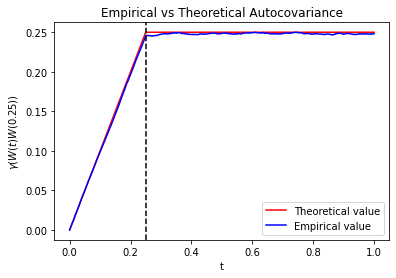

In [ ]:
empirical_values, theoretical_values, integration_grid = utils_sims.get_wiener_empiric_and_theoretical_values(
    amount_of_trajectories=10000, amount_of_time_steps=1000, 
    initial_time=0.0, threshold_time=0.25, initial_level=0, simulation_length=1.0
)

utils_plots.plot_wiener_empiric_and_theoretical_values(
    empirical_values, theoretical_values, integration_grid, threshold_time=0.25
)

# **Exercise 7** 

Consider two independent Wiener processes $W(t), W'(t)$. Show that the following processes have the same covariances as the standard Wiener process:

a) $V_1(t) = \rho W(t) + \sqrt{1 - \rho^2}W'(t) \;\;\; t ≥ 0$

b) $V_2(t) = -W(t); t ≥ 0 $

c) $V_3(t) = \sqrt{c}W(t/c)$; $\;\;\; t ≥ 0, c > 0$

d) $V_4(0) = 0; V_4(t) = tW(1/t), t > 0$

#### **Solution** 
As it was proven in the previuos exercise that the autocovariance of a Wiener process is given by:

$$\gamma(t,s) = \mathbb{E}[W(t)W(s)] = t$; when $t < s$$
 
Therefore, a way to prove that every process has the same covariance as the standard Wiener process is to show that its $\mathbb{E}[W(t)W(s)]=t$.

Given $t < s$ for all the sections:

**a)** 

$$
\mathbb{E}[V_1(t)V_1(s)] = 
\rho^2 \mathbb{E}[W(t)W(s)] + 
\rho \sqrt{1 - \rho^2} \underbrace{{E}[W'(t)W(s)]}_{W'(t) \perp W(s)} + 
\rho \sqrt{1 - \rho^2} \underbrace{{E}[W(t)W'(s)]}_{W(t) \perp W'(s)} + 
(1 - \rho^2) \mathbb{E}[W'(t)W'(s)] = 
\rho^2t + (1-\rho^2)t = t
$$

**b)**

$$
\mathbb{E}[V_2(t)V_2(s)] = \mathbb{E}[(-W(t))(-W(s))] = \mathbb{E}[W(t)W(s)] = t
$$


**c)**

$$
\mathbb{E}[V_3(t)V_3(s)] = c\mathbb{E}[W(t/c)(W(s/c)] = c \min(\frac{t}{c}, \frac{s}{c}) = c\frac{t}{c} = t
$$

**d)**

$$
\mathbb{E}[V_4(t)V_4(s)] = ts\mathbb{E}[W(1/t)(W(1/s)] = ts\min(1/t, 1/s)= t\frac{s}{s}= t
$$

**Make a plot of the trajectories of the first three processes to illustrate that they are standard Brownian motion processes. Compare the histogram of the final values of the simulated trajectories with the
theoretical density function.**

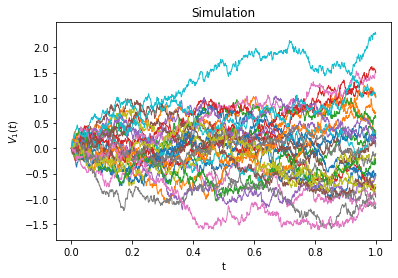

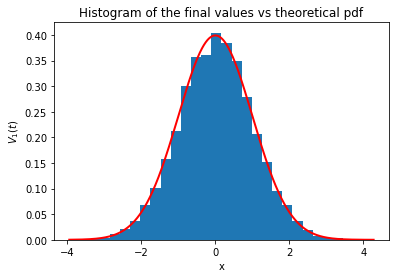

In [ ]:
v1_process_values, integration_grid = utils_sims.get_v1_process_values(
    amount_of_trajectories=10000, amount_of_time_steps=1000,
    initial_time=0.0, rho_value=0.25,
    initial_level=0, simulation_length=1.0
)

utils_plots.plot_trajectories_and_histogram(
    v1_process_values, integration_grid, process_number=1, 
    initial_level=0, simulation_length=1.0, 
    max_trajectories=30, max_bins=30 
)

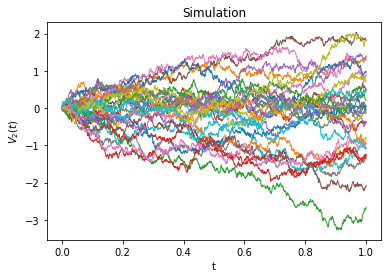

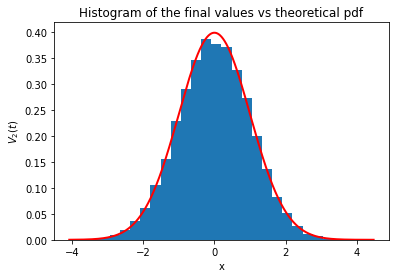

In [ ]:
v2_process_values, integration_grid = utils_sims.get_v2_process_values(
    amount_of_trajectories=10000, amount_of_time_steps=1000,
    initial_time=0.0, initial_level=0, simulation_length=1.0
)

utils_plots.plot_trajectories_and_histogram(
    v2_process_values, integration_grid, process_number=2, 
    initial_level=0, simulation_length=1.0, 
    max_trajectories=30, max_bins=30 
)

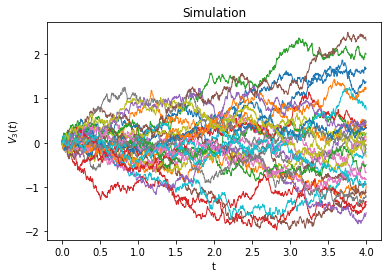

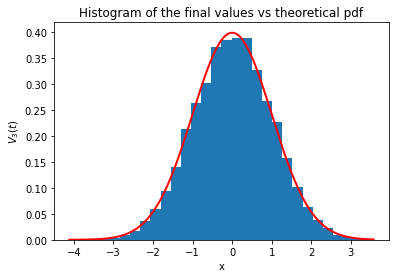

In [ ]:
v3_process_values, integration_grid = utils_sims.get_v3_process_values(
    amount_of_trajectories=10000, amount_of_time_steps=1000,
    initial_time=0.0, c_value=0.25,
    initial_level=0, simulation_length=1.0
)

utils_plots.plot_trajectories_and_histogram(
    v3_process_values, integration_grid, process_number=3, 
    initial_level=0, simulation_length=1.0, 
    max_trajectories=30, max_bins=30 
)